In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

### 1. 讀入 Fashion MNSIT 數據集

In [2]:
from tensorflow.keras.datasets import fashion_mnist

In [3]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

### 2. 欣賞數據集內容

#### 查看資料的維度和的資料型態

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_test.shape

(10000, 28, 28)

In [6]:
type(x_train)

numpy.ndarray

In [7]:
print('資料集中單一圖片的像素範圍：', np.min(x_train[0]), '~', np.max(x_train[0]))

資料集中單一圖片的像素範圍： 0 ~ 255


In [8]:
set(y_train) # 查看y有哪幾種類別

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

#### 隨機查看訓練集其中一張圖片及其標籤

In [9]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

這是 Bag


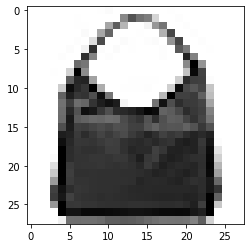

In [10]:
from random import randint
n = randint(1, x_train.shape[0])
print('這是', class_names[y_train[n]])
plt.imshow(x_train[n], cmap = 'Greys');

#### 隨機查看訓練集其中五張圖片及其標籤

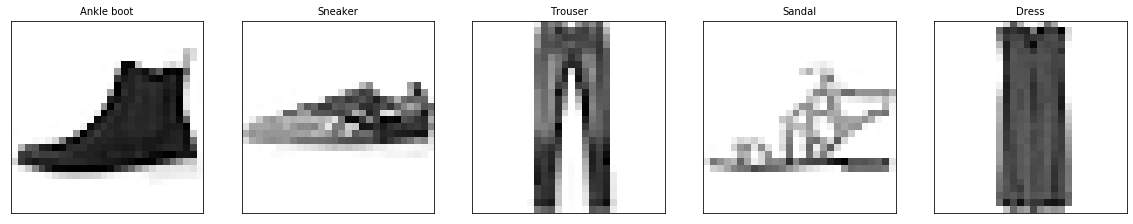

In [11]:
pick = np.random.choice(60000, 5, replace=False)
plt.figure(figsize=(20,10)) # 調整畫布的大小

for i in range(5):
    n = pick[i]
    ax = plt.subplot(151+i)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(class_names[y_train[n]], fontsize=10)
    plt.imshow(x_train[n], cmap='Greys')  

#### 查看y類別索引和類別名稱的配對

In [12]:
import pandas as pd
dict = {"class_index": list(set(y_train)), "class_name": class_names}
df = pd.DataFrame(dict)
df

,class_index,class_name
0,0,T-shirt/top
1,1,Trouser
2,2,Pullover
3,3,Dress
4,4,Coat
5,5,Sandal
6,6,Shirt
7,7,Sneaker
8,8,Bag
9,9,Ankle boot


### 3. 資料整理

#### 將圖片中的像素正規化 range(0, 255) → range(0, 1)

In [13]:
x_train = x_train / 255
x_test = x_test / 255

#### 將28*28個像素的圖片拉平成1維的向量

In [14]:
x_train = x_train.reshape(-1, x_train.shape[1] * x_train.shape[2])
x_test = x_test.reshape(-1, x_test.shape[1] * x_test.shape[2])

#### 對y進行獨熱編碼(one-hot encoding)

In [15]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

### 4. 打造神經網路(DNN)

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense # dense：全連結神經層
from tensorflow.keras.optimizers import SGD # SGD：隨機梯度下降法(最標準的學習方式)

**這裡的loss我使用交叉熵，因為分類問題用MSE做為分類問題的損失函數可能會發生梯度消失的問題；**  
**而optimizer我選用adam，好處就是adam會在訓練的過程中自己調整學習率，不用像SGD要自己先設一個學習率才能開始訓練。**

In [17]:
import keras
model = Sequential() # 開一個空白的函數學習機
model.add(Dense(128, input_dim = x_train.shape[1], activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(10, activation = 'softmax')) # softmax: 讓輸出全部介於0~1之間，而且加起來等於1
model.compile(loss = keras.losses.categorical_crossentropy, optimizer = 'adam', metrics = ['accuracy'])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Using TensorFlow backend.


#### 查看模型結構

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________


**這裡我有實施「early stopping」，即模型訓練一段時間之後，當準確率不再有顯著的提升就提早結束訓練，這樣不僅能夠節省訓練的時間，也可以防止模型過度擬合。**

In [19]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor = 'val_loss', patience = 0, verbose = 0, mode = 'auto') # default 

### 5. 訓練

#### 這裡我用訓練集中三成的資料做為驗證集，即用60000 * 0.3 = 18000筆資料做為驗證集。

In [20]:
history = model.fit(x_train, y_train, batch_size = 100, epochs = 20, validation_split = 0.3, callbacks = [early_stopping])

Train on 42000 samples, validate on 18000 samples
Epoch 1/20
42000/42000 [==============================] - 2s 54us/sample - loss: 0.5965 - acc: 0.7936 - val_loss: 0.4711 - val_acc: 0.8344
Epoch 2/20
42000/42000 [==============================] - 2s 47us/sample - loss: 0.4182 - acc: 0.8511 - val_loss: 0.4004 - val_acc: 0.8588
Epoch 3/20
42000/42000 [==============================] - 2s 45us/sample - loss: 0.3707 - acc: 0.8667 - val_loss: 0.3646 - val_acc: 0.8707
Epoch 4/20
42000/42000 [==============================] - 2s 44us/sample - loss: 0.3415 - acc: 0.8752 - val_loss: 0.3627 - val_acc: 0.8696
Epoch 5/20
42000/42000 [==============================] - 2s 45us/sample - loss: 0.3210 - acc: 0.8818 - val_loss: 0.3420 - val_acc: 0.8767
Epoch 6/20
42000/42000 [==============================] - 2s 45us/sample - loss: 0.3058 - acc: 0.8877 - val_loss: 0.3380 - val_acc: 0.8771
Epoch 7/20
42000/42000 [==============================] - 2s 45us/sample - loss: 0.2953 - acc: 0.8908 - val_loss: 0.

### 6. 訓練成果

#### 畫出訓練過程中訓練集和驗證集準確率和loss值的變化情形

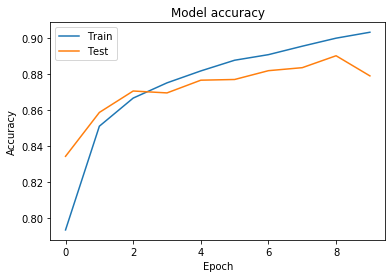

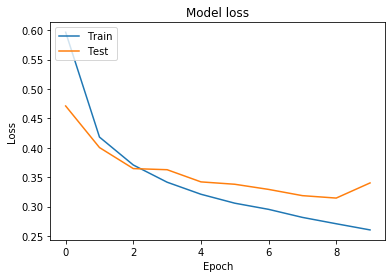

In [21]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#### 查看該模型預測測試集資料的結果

In [22]:
score = model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 1s 60us/sample - loss: 0.3625 - acc: 0.8713
Test loss: 0.36251205906867984
Test accuracy: 0.8713


#### 隨機顯示測試集中一張圖片的標籤和模型辨識的結果

這是 Pullover
神經網路預測是 Pullover


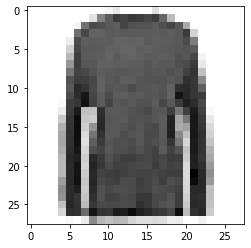

In [23]:
from numpy import argmax
result = model.predict_classes(x_test) 
n = randint(1, x_test.shape[0])
print('這是', class_names[argmax(y_test[n])])
print('神經網路預測是', class_names[result[n]])
plt.imshow(x_test[n].reshape(28,28), cmap = 'Greys')